# DRW-simulated Light Curves Analysis

By Xinyue Sheng (2021.6.10)

### We compared PLAsTiCC AGN drw parameters and s82 AGN drw parameters

### This file is for generating 2000 AGN light curves with DRW model. The model paramters are from 'plasticc_modelpar_088_AGN.csv'


In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl

import eztao
from eztao.carma import DRW_term,DHO_term, CARMA_term
from eztao.ts import gpSimRand,gpSimFull
from eztao.ts import drw_fit
from celerite import GP
from eztao.ts import gpSimFull, gpSimByTime
from eztao.ts.carma_fit import sample_carma

### 1. Form sample params set from PLAsTiCC 'modelpar_088_AGN.csv'

In [3]:
model_params = pd.read_csv('plasticc_modelpar_088_AGN.csv').drop(columns = ['submodel','sim_av'])
z = model_params['REDSHIFT']
# sample_z = z.sample(2000)

In [4]:
len(model_params)

101794

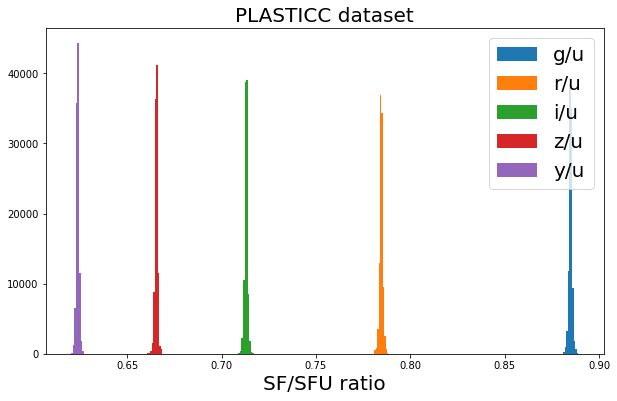

In [46]:
# plt.scatter(model_params['REDSHIFT'], model_params['SFU']/model_params['SFG'])
# plt.hist(model_params['SFU']/model_params['SFU'], label = 'u')
plt.figure(figsize = (10,6))
plt.hist(model_params['SFG']/model_params['SFU'], label = 'g/u')
plt.hist(model_params['SFR']/model_params['SFU'], label = 'r/u')
plt.hist(model_params['SFI']/model_params['SFU'], label = 'i/u')
plt.hist(model_params['SFZ']/model_params['SFU'], label = 'z/u')
plt.hist(model_params['SFY']/model_params['SFU'], label = 'y/u')
plt.legend(loc = 'upper right', fontsize = 20)
plt.xlabel('SF/SFU ratio', fontsize = 20)
plt.title('PLASTICC dataset', fontsize = 20)
plt.show()

In [95]:
normal_SFU = (model_params['SFU'] - np.mean(model_params['SFU']))/np.std(model_params['SFU'])
for i in ['U','G','R','I','Z','Y']:
    normal_SF = (model_params['SF'+i] - np.mean(model_params['SF'+i]))/np.std(model_params['SF'+i])
    print(np.mean(normal_SF)/np.mean(normal_SFU))

1.0
-0.11171110849725832
0.3745893344658802
0.328476109877173
-1.0428145267862563
-0.8873181006285071


In [3]:
import s82drw.s82_analysis

S82_SF = {}
S82_TAU = {}
for i in ['u','g','r','i','z']:
    df = pd.read_csv('s82drw/s82drw_'+i+'.csv')
    df['log_SF'] = np.array(df['log10(sigma[mag/sqrt(yr)])']).astype('float32')+0.5*(np.array(df['log10(tau[days])']).astype('float32') - np.log10(365))
    df = df.astype('float32')
    df = df.rename(columns={'log10(tau[days])':'log_tau'})
    df = df[(df.edge_flag==0)&(df.Plike-df.Pnoise>2)&
               (df.Plike-df.Pinf> 0.05)&(df.log_tau<5)&
               (df.log_tau>0)]
    S82_SF[i] = 10**df['log_SF']
    S82_TAU[i] = 10**df['log_tau']
    
    
S82_df = pd.DataFrame(list(zip(S82_SF['u'], S82_SF['g'], S82_SF['r'], S82_SF['i'], S82_SF['z'])), columns = ['u','g','r','i','z'])
S82_TAU_df = pd.DataFrame(list(zip(S82_TAU['u'], S82_TAU['g'], S82_TAU['r'], S82_TAU['i'], S82_TAU['z'])), columns = ['u','g','r','i','z'])




1.0
1.2914820259127056
1.5089354073862422
1.2783072340543342
1.2625407986072932


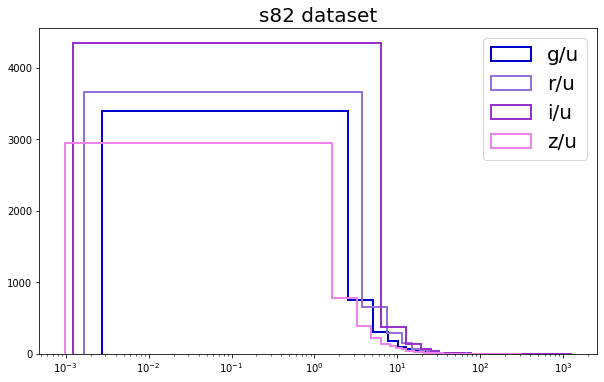

In [7]:
# S82_df = S82_df[(S82_df.u<6)&(S82_df.g<6)&(S82_df.r<6)&(S82_df.i<6)&(S82_df.z<6)]

plt.figure(figsize = (10,6))

colorlist = ['mediumblue','mediumpurple','darkorchid','violet']

mean_sfu = np.mean(S82_TAU_df['u'])
n = 0
for i in ['g','r','i','z']:
    plt.hist(S82_TAU_df[i]/S82_TAU_df['u'], bins = 200, label = i+'/u', color = colorlist[n],
            ls = '-', lw = 2, histtype='step',stacked=True)
    n +=1

for i in ['u','g','r','i','z']:
#     mean = np.mean(S82_df[i]/mean_sfu)
    print(np.mean(S82_TAU_df[i])/np.mean(S82_TAU_df['u']))
    

plt.legend(loc = 'upper right', fontsize = 20)
# plt.xlabel('SF/SFU ratio', fontsize = 20)
plt.title('s82 dataset', fontsize = 20)
plt.xscale('log')
# plt.ylim(0,150)
# plt.xlim(0,10)




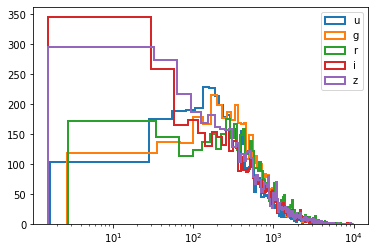

In [24]:
# plt.scatter(S82_TAU_df['u'], S82_TAU_df['g'],s = 1)
# plt.scatter(S82_TAU_df['u'], S82_TAU_df['r'],s = 1)
# plt.scatter(S82_TAU_df['u'], S82_TAU_df['i'],s = 1)
# plt.scatter(S82_TAU_df['u'], S82_TAU_df['z'],s = 1)
for i in ['u','g','r','i','z']:
    plt.hist(S82_TAU_df[i], bins = 300, label = i, ls = '-', lw = 2, histtype='step',stacked=True)
# plt.xlim(0,4000)
plt.legend()
plt.xscale('log')

In [20]:
S82_TAU_df[:100]

,u,g,r,i,z
0,98.969177,88.770767,79.729683,42.407238,189.565811
1,189.116776,1192.806641,535.907654,1771.658203,208.646011
2,74.961800,154.657120,275.562500,374.308777,85.893433
3,298.772003,772.858337,746.345764,680.957642,954.420837
4,50.949505,268.460236,343.020477,254.847305,270.875671
...,...,...,...,...,...
95,44.607719,49.782879,119.341118,370.279846,461.243164
96,146.231186,363.186646,236.433990,261.438812,186.848709
97,176.270676,211.295334,945.910645,1072.654541,111.058067
98,548.959229,869.801147,826.170959,6.781644,88.989746


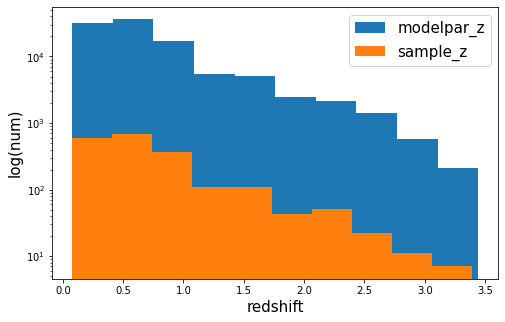

In [12]:
plt.figure(figsize = (8,5))
plt.hist(z, label = 'modelpar_z')
plt.hist(sample_z, label = 'sample_z')
plt.yscale('log')
plt.xlabel('redshift', fontsize = 15)
plt.ylabel('log(num)', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [31]:
sample_params = model_params.iloc[sample_z.index.tolist()].reset_index()
del model_params

sample_params

,index,object_id,SEED,TAU,SFU,SFG,SFR,SFI,SFZ,SFY,REDSHIFT
0,5453,7313329,4422811,210.1700,0.320,0.284,0.251,0.228,0.213,0.200,0.9846
1,86406,110823043,3580409,503.2000,0.471,0.417,0.370,0.336,0.314,0.294,0.8616
2,83935,107591556,41170,187.5400,1.074,0.951,0.843,0.766,0.715,0.670,0.3226
3,93782,120400595,9782,218.6700,1.186,1.050,0.931,0.846,0.789,0.740,0.1503
4,2241,3228343,42907,81.0541,0.676,0.598,0.530,0.482,0.450,0.422,0.2884
...,...,...,...,...,...,...,...,...,...,...,...
1995,52879,67505054,2268008,392.1800,0.281,0.249,0.221,0.200,0.187,0.175,1.6751
1996,50621,64683731,187258,177.3000,0.637,0.564,0.500,0.454,0.424,0.397,0.4750
1997,3722,5058105,17837328,80.3824,0.639,0.566,0.502,0.456,0.426,0.399,0.1523
1998,51594,65924341,523500,297.6300,0.572,0.506,0.448,0.408,0.380,0.357,0.5823


In [32]:
sample_params.to_csv('2000_drw_params.csv')

### Read '2000_drw_params.csv'

In [2]:
sample_params = pd.read_csv('2000_drw_params.csv')

### 2. Plot the distribution between SF and Tau

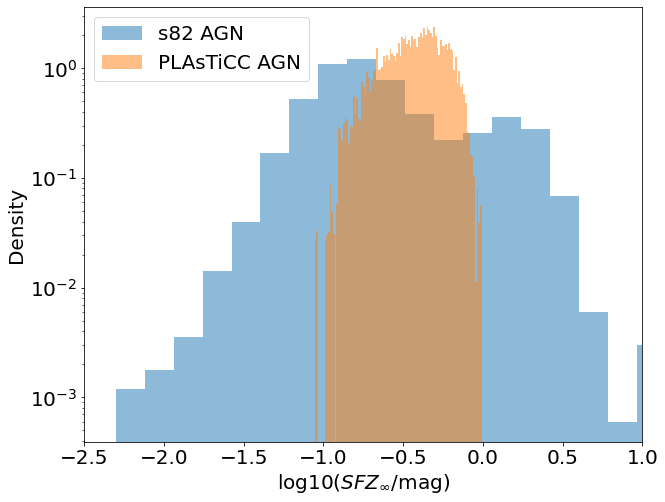

In [235]:
import s82drw.s82_analysis
log_SF_s82, redshift_s82, log_tau_s82 = s82drw.s82_analysis.cal_s82_log_SF('s82drw/s82drw_z.dat')

# plot PLAsTiCC SF_infty distribution
plt.figure(figsize = (10,8))
kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)
plt.hist(log_SF_s82,  **kwargs, label = 's82 AGN')
plt.hist(np.log10(model_params['SFZ']), **kwargs, label = 'PLAsTiCC AGN')
plt.xlabel(r'log10($SFZ_{\infty}$/mag)', fontsize = 20)
plt.ylabel('Density', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim([-2.5,1])
plt.legend(fontsize = 20)
plt.yscale('log')
# plt.title(r'PLAsTiCC $SF_{\infty}$ distribution',fontsize = 20)
plt.show()


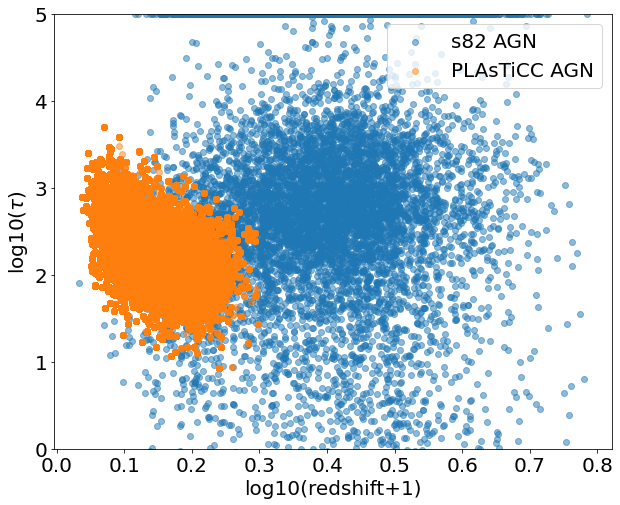

In [236]:
plt.figure(figsize = (10,8))
kwargs = dict(alpha=0.5)
plt.scatter(np.log10(redshift_s82+1),log_tau_s82,  **kwargs, label = 's82 AGN')
plt.scatter(np.log10(model_params['SFZ']+1),np.log10(model_params['TAU']), **kwargs, label = 'PLAsTiCC AGN' )
plt.legend(fontsize = 20)
plt.xlabel('log10(redshift+1)', fontsize = 20)
plt.ylabel(r'log10($\tau$)', fontsize = 20)
plt.ylim([0,5])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


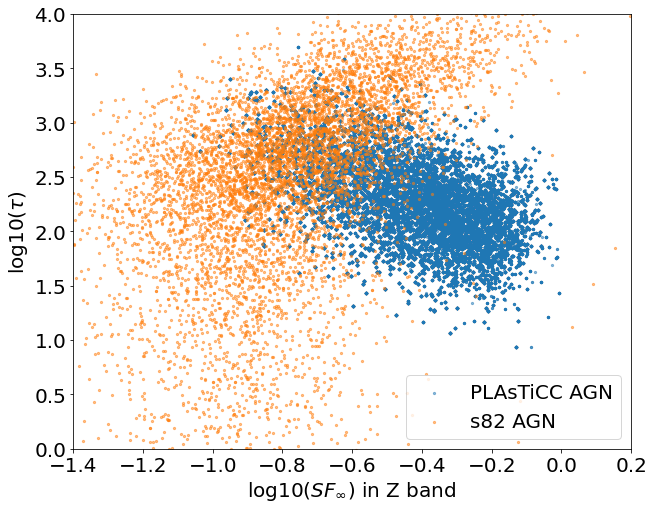

In [109]:
plt.figure(figsize = (10,8))
plt.scatter(np.log10(model_params['SFZ']),np.log10(model_params['TAU']), alpha=0.5, s = 5,  label = 'PLAsTiCC AGN')
plt.scatter(log_SF_s82, log_tau_s82, alpha=0.5, s = 5, label = 's82 AGN')
plt.xlim([-1.4,0.2])
plt.ylim([0,4])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(r'log10($\tau$)',fontsize = 20)
plt.xlabel(r'log10($SF_{\infty}$) in Z band', fontsize = 20)
plt.legend(fontsize = 20)
plt.show()



### After consideration, we think s82 has broader range in redshift, and SF_infy is more close to recent  research: rms variability~0.2

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl

import eztao
from eztao.carma import DRW_term,DHO_term, CARMA_term
from eztao.ts import gpSimRand,gpSimFull
from eztao.ts import drw_fit
from celerite import GP
from eztao.ts import gpSimFull, gpSimByTime
from eztao.ts.carma_fit import sample_carma

#### select proper drw params from s82, according to http://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern_format_drw.html

In [2]:
df = pd.read_csv('s82drw/s82drw_g.csv')
df['log_SF'] = np.array(df['log10(sigma[mag/sqrt(yr)])']).astype('float32')+0.5*(np.array(df['log10(tau[days])']).astype('float32') - np.log10(365))
df = df.astype('float32')

In [3]:
df

,Unnamed: 0,SDR5ID,ra,dec,redshift,M_i,mass_BH[M/M_sun],chi^2_pdf,log10(tau[days]),log10(sigma[mag/sqrt(yr)]),...,log10(tau_lim_hi),log10(sig_lim_lo),log10(sig_lim_hi),edge_flag,Plike,Pnoise,Pinf,mu,npts,log_SF
0,0.0,301.0,2.169302,1.238649,1.0730,-23.900999,0.000,0.956316,1.94827,-0.663266,...,2.69370,-0.833362,-0.607438,0.0,144.029999,113.517998,140.641006,20.584200,60.0,-0.970277
1,1.0,144.0,1.091028,0.962126,0.7867,-23.399000,0.000,1.128130,3.07657,-0.762640,...,4.58319,-0.865218,-0.706777,0.0,127.642998,68.432503,127.459000,20.209299,52.0,-0.505501
2,2.0,58.0,0.331289,0.177230,1.6199,-24.735001,0.000,1.207040,2.18937,-0.651207,...,3.30417,-0.800167,-0.586983,0.0,123.980003,92.152100,121.413002,20.286501,54.0,-0.837668
3,3.0,190.0,1.364696,-0.098956,0.6125,-23.121000,0.000,0.911668,2.88810,-0.618568,...,4.51105,-0.699902,-0.585839,0.0,151.651993,77.742798,151.175003,19.451401,60.0,-0.455664
4,4.0,36.0,0.221552,-0.292485,2.7563,-26.451000,9.361,1.064070,2.42888,-1.076600,...,4.14666,-1.243570,-1.008530,0.0,163.554001,143.046997,162.181000,19.657200,56.0,-1.143306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9253,9253.0,-1.0,35.943745,1.257434,2.4170,-24.260000,-1.000,1.342080,2.41010,-0.573130,...,4.06310,-0.731752,-0.501976,0.0,102.858002,77.331398,101.373001,21.353399,60.0,-0.649226
9254,9254.0,-1.0,35.959663,1.242573,1.8010,-24.370001,-1.000,1.438050,3.09846,-0.897377,...,4.56787,-1.027830,-0.797149,0.0,94.839996,72.957298,94.598900,21.757601,59.0,-0.629293
9255,9255.0,-1.0,44.045433,1.223469,0.9870,-23.100000,-1.000,1.006540,2.34696,-0.417286,...,3.79784,-0.531466,-0.376309,0.0,101.772003,48.626999,99.656898,20.858900,55.0,-0.524952
9256,9256.0,-1.0,55.363995,1.253936,3.1040,-25.760000,-1.000,1.502570,3.44848,-0.890641,...,4.61993,-1.023870,-0.771931,0.0,106.097000,92.550598,106.025002,21.295200,55.0,-0.447547


In [7]:
df = df.rename(columns={'log10(tau[days])':'log_tau'})
df = df[(df.edge_flag==0)&(df.Plike-df.Pnoise>2)&
               (df.Plike-df.Pinf> 0.05)&(df.log_tau<5)&
               (df.log_tau>0)]

In [8]:
df = df.reset_index()

In [14]:
df

,index,Unnamed: 0,SDR5ID,ra,dec,redshift,M_i,mass_BH[M/M_sun],chi^2_pdf,log_tau,...,log10(tau_lim_hi),log10(sig_lim_lo),log10(sig_lim_hi),edge_flag,Plike,Pnoise,Pinf,mu,npts,log_SF
0,0,0.0,301.0,2.169302,1.238649,1.0730,-23.900999,0.000,0.956316,1.94827,...,2.69370,-0.833362,-0.607438,0.0,144.029999,113.517998,140.641006,20.584200,60.0,-0.970277
1,1,1.0,144.0,1.091028,0.962126,0.7867,-23.399000,0.000,1.128130,3.07657,...,4.58319,-0.865218,-0.706777,0.0,127.642998,68.432503,127.459000,20.209299,52.0,-0.505501
2,2,2.0,58.0,0.331289,0.177230,1.6199,-24.735001,0.000,1.207040,2.18937,...,3.30417,-0.800167,-0.586983,0.0,123.980003,92.152100,121.413002,20.286501,54.0,-0.837668
3,3,3.0,190.0,1.364696,-0.098956,0.6125,-23.121000,0.000,0.911668,2.88810,...,4.51105,-0.699902,-0.585839,0.0,151.651993,77.742798,151.175003,19.451401,60.0,-0.455664
4,4,4.0,36.0,0.221552,-0.292485,2.7563,-26.451000,9.361,1.064070,2.42888,...,4.14666,-1.243570,-1.008530,0.0,163.554001,143.046997,162.181000,19.657200,56.0,-1.143306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,9253,9253.0,-1.0,35.943745,1.257434,2.4170,-24.260000,-1.000,1.342080,2.41010,...,4.06310,-0.731752,-0.501976,0.0,102.858002,77.331398,101.373001,21.353399,60.0,-0.649226
7380,9254,9254.0,-1.0,35.959663,1.242573,1.8010,-24.370001,-1.000,1.438050,3.09846,...,4.56787,-1.027830,-0.797149,0.0,94.839996,72.957298,94.598900,21.757601,59.0,-0.629293
7381,9255,9255.0,-1.0,44.045433,1.223469,0.9870,-23.100000,-1.000,1.006540,2.34696,...,3.79784,-0.531466,-0.376309,0.0,101.772003,48.626999,99.656898,20.858900,55.0,-0.524952
7382,9256,9256.0,-1.0,55.363995,1.253936,3.1040,-25.760000,-1.000,1.502570,3.44848,...,4.61993,-1.023870,-0.771931,0.0,106.097000,92.550598,106.025002,21.295200,55.0,-0.447547


In [9]:
# plt.hist(select_df['redshift'], bins = 200)
sample_z = df['redshift'].sample(1000)
sample_z = sample_z.to_frame(name = 'redshift')
sample_z.to_csv('s82_z_1000.csv')

In [10]:
drw_set = df.sample(n=1000)
drw_set.to_csv('model_params/DHO_params.csv')

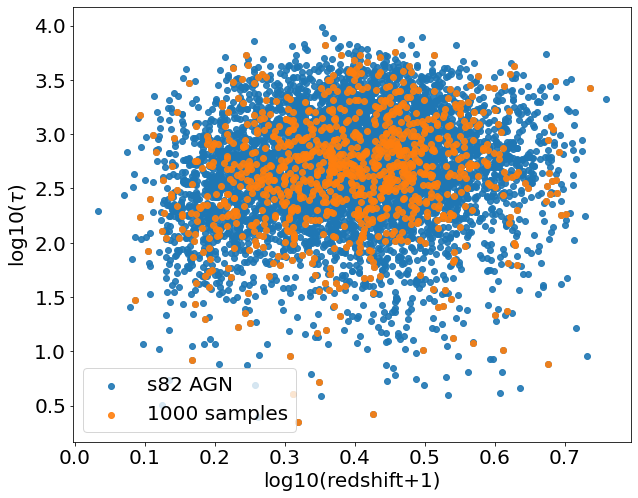

In [12]:
plt.figure(figsize = (10,8))
kwargs = dict(alpha=0.9)
plt.scatter(np.log10(df['redshift']+1),df['log_tau'],  **kwargs, label = 's82 AGN')
plt.scatter(np.log10(drw_set['redshift']+1),drw_set['log_tau'],  **kwargs, label = '1000 samples')

plt.legend(fontsize = 20)
plt.xlabel('log10(redshift+1)', fontsize = 20)
plt.ylabel(r'log10($\tau$)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

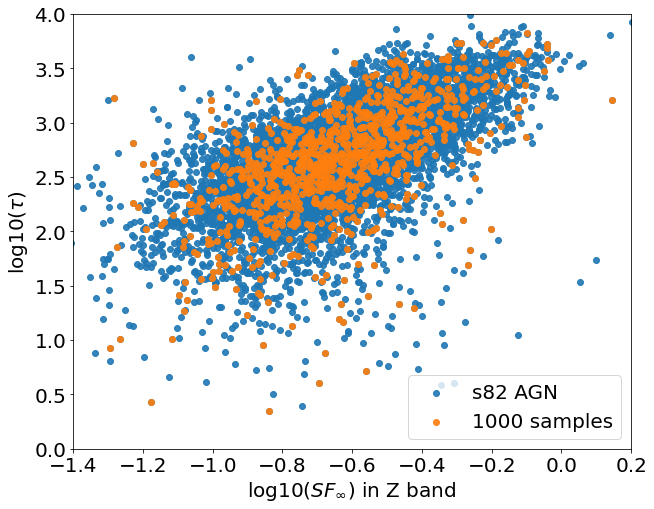

In [13]:
plt.figure(figsize = (10,8))
plt.scatter(df['log_SF'],df['log_tau'],  **kwargs, label = 's82 AGN')
plt.scatter(drw_set['log_SF'],drw_set['log_tau'],  **kwargs, label = '1000 samples')
plt.xlim([-1.4,0.2])
plt.ylim([0,4])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(r'log10($\tau$)',fontsize = 20)
plt.xlabel(r'log10($SF_{\infty}$) in Z band', fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

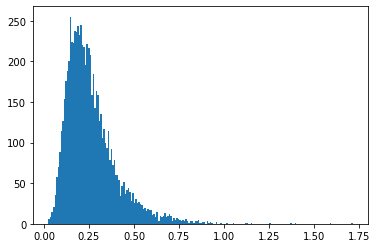

In [19]:
plt.hist((10**select_df['log_SF']), bins = 200)
# plt.xscale('log')
plt.show()

0.14617854356765747

In [27]:
drw_sf = 10**select_df['log_SF'].sample(1000)

In [34]:
SFG = drw_sf.to_frame(name = 'SFG')

In [35]:
SFG.to_csv('s82_SFG_1000.csv')

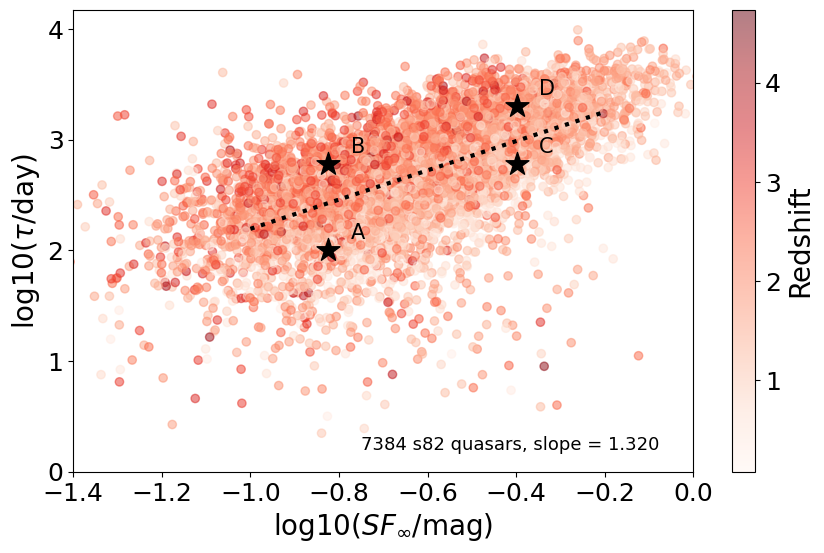

In [14]:
from astropy.modeling import models, fitting
plt.rcParams.update(plt.rcParamsDefault)

select_df =select_df .astype(np.float128)

# # Turn on LaTeX formatting for text    
# plt.rcParams['text.usetex']=True

# # Place the command in the text.latex.preamble using rcParams
# plt.rcParams['text.latex.preamble']=r'\makeatletter \newcommand*{\rom}[1]{\expandafter\@slowromancap\romannumeral #1@} \makeatother'


# fit a regression line for SF-tau distribution
fit = fitting.LinearLSQFitter()
line_init = models.Linear1D()
fitted_line = fit(line_init, select_df['log_SF'],select_df['log_tau'])
slope = fitted_line.parameters[0]


star_sf = np.array([0.15, 0.15, 0.40, 0.40])
star_tau = np.array([100,600,600,2000])
star_points_lSF = np.log10(star_sf)
star_points_ltau = np.log10(star_tau)


plt.figure(figsize = (10,6))

plt.scatter(select_df['log_SF'],select_df['log_tau'], c = select_df['redshift'], cmap='Reds',
            alpha=0.5)
cbar = plt.colorbar(label='Redshift')
plt.scatter(star_points_lSF, star_points_ltau, marker = "*", s = 300, color = 'black')


plt.plot([-1,-0.2], fitted_line(np.array([-1,-0.2])), c = 'black', linestyle=':', linewidth=3)

cbar.ax.tick_params(labelsize=18) 
cbar.set_label(label='Redshift',size=20)
plt.text(-0.75,0.2,'7384 s82 quasars, slope = {0:.3f}'.format(slope), fontsize = 13)

n = 0
for sym in ['A','B','C','D']:
    plt.text(star_points_lSF[n]+0.05,star_points_ltau[n]+0.1, sym, fontsize = 15,color = 'black' )
    n +=1
    


# plt.legend(fontsize = 15)
plt.xlabel(r'log10($SF_{\infty}$/mag)', fontsize = 20)
plt.ylabel(r'log10($\tau$/day)', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlim([-1.4,0])
plt.yticks([0,1,2,3,4])
plt.show()



In [10]:

print(star_sf, star_tau)

[0.15 0.15 0.4  0.4 ] [ 100  600  600 2000]


### 3. Simulate light curve

In [1]:
import numbers
import math

def simulate_agn(_agn_walk_start_date, expmjd, tau, time_dilation, sf_u, seed):
        """
    Simulate the u-band light curve for a single AGN

    Parameters
    ----------
    expmjd -- a number or numpy array of dates for the light curver

    tau -- the characteristic timescale of the AGN in days

    time_dilation -- (1+z) for the AGN

    sf_u -- the u-band structure function of the AGN

    seed -- the seed for the random number generator

    Returns
    -------
    a numpy array (or number) of delta_magnitude in the u-band at expmjd
    """

    # calculate the observed frame time

        if not isinstance(expmjd, numbers.Number):
            d_m_out = np.zeros(len(expmjd))
            duration_observer_frame = max(expmjd) - _agn_walk_start_date
        else:
            duration_observer_frame = expmjd - _agn_walk_start_date


        rng = np.random.RandomState(seed)
        dt = tau/100.
        duration_rest_frame = duration_observer_frame/time_dilation
        nbins = int(math.ceil(duration_rest_frame/dt))+1

        time_dexes = np.round((expmjd-_agn_walk_start_date)/(time_dilation*dt)).astype(int)
        time_dex_map = {}
        ct_dex = 0
        if not isinstance(time_dexes, numbers.Number):
            for i_t_dex, t_dex in enumerate(time_dexes):
                if t_dex in time_dex_map:
                    time_dex_map[t_dex].append(i_t_dex)
                else:
                    time_dex_map[t_dex] = [i_t_dex]
            time_dexes = set(time_dexes)
        else:
            time_dex_map[time_dexes] = [0]
            time_dexes = set([time_dexes])

        dx2 = 0.0
        x1 = 0.0
        x2 = 0.0

        dt_over_tau = dt/tau
        es = rng.normal(0., 1., nbins)*math.sqrt(dt_over_tau)
        for i_time in range(nbins):
            #The second term differs from Zeljko's equation by sqrt(2.) because he assumes stdev = sf_u/sqrt(2)
            dx1 = dx2
            dx2 = -dx1*dt_over_tau + sf_u*es[i_time] + dx1
            x1 = x2
            x2 += dt

            if i_time in time_dexes:
                if isinstance(expmjd, numbers.Number):
                    dm_val = ((expmjd-_agn_walk_start_date)*(dx1-dx2)/time_dilation+dx2*x1-dx1*x2)/(x1-x2)
                    d_m_out = dm_val
                else:
                    for i_time_out in time_dex_map[i_time]:
                        local_end = (expmjd[i_time_out]-_agn_walk_start_date)/time_dilation
                        dm_val = (local_end*(dx1-dx2)+dx2*x1-dx1*x2)/(x1-x2)
                        d_m_out[i_time_out] = dm_val

        return d_m_out

In [5]:
def simulate_lc(tau, RMS_var, npts, duration, SNR):
    # as Eztao doesn't provide flexible SNR, will change to the original code.

    DRW_kernel = DRW_term(np.log(RMS_var), np.log(tau))
    t_drw, y_drw, yerr_drw = gpSimFull(DRW_kernel, SNR, duration, npts, log_flux=True)
    return t_drw, y_drw, yerr_drw


def plot_lc(t_drw, y_drw, yerr_drw, SF, tau, redshift): 
    plt.figure(figsize = (12,5))
    plt.errorbar(t_drw, y_drw, yerr_drw, fmt='.', label = r'$SF_\infty = {},\tau = {}, z = {}$'.format(round(SF,3), round(tau,3), round(redshift,3)))
    plt.xlabel('Time (day)', fontsize = 20)
    plt.ylabel('mag', fontsize = 20)
    plt.legend(fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show()
    
def downsampling(cadence, t_drw, y_drw, yerr_drw):
    t_drw = t_drw.astype('int32')
    downsample_mjds, t_idx, c_idx = np.intersect1d(t_drw, cadence,return_indices=True)
    return t_drw[t_idx], y_drw[t_idx], yerr_drw[t_idx]

def add_lsst_noise(mag, gamma = 0.039, alpha_sys = 0.005, m5 = 24.7):
    x = 10**(0.4*(mag-m5))
    alpha_rand_2 = (0.04-gamma)*x + gamma*(x**2)
    alpha_lsst_2 = alpha_sys**2+alpha_rand_2
    noise = np.random.normal(0,np.sqrt(alpha_lsst_2))
    return mag, noise



### Simulate a group of light curves

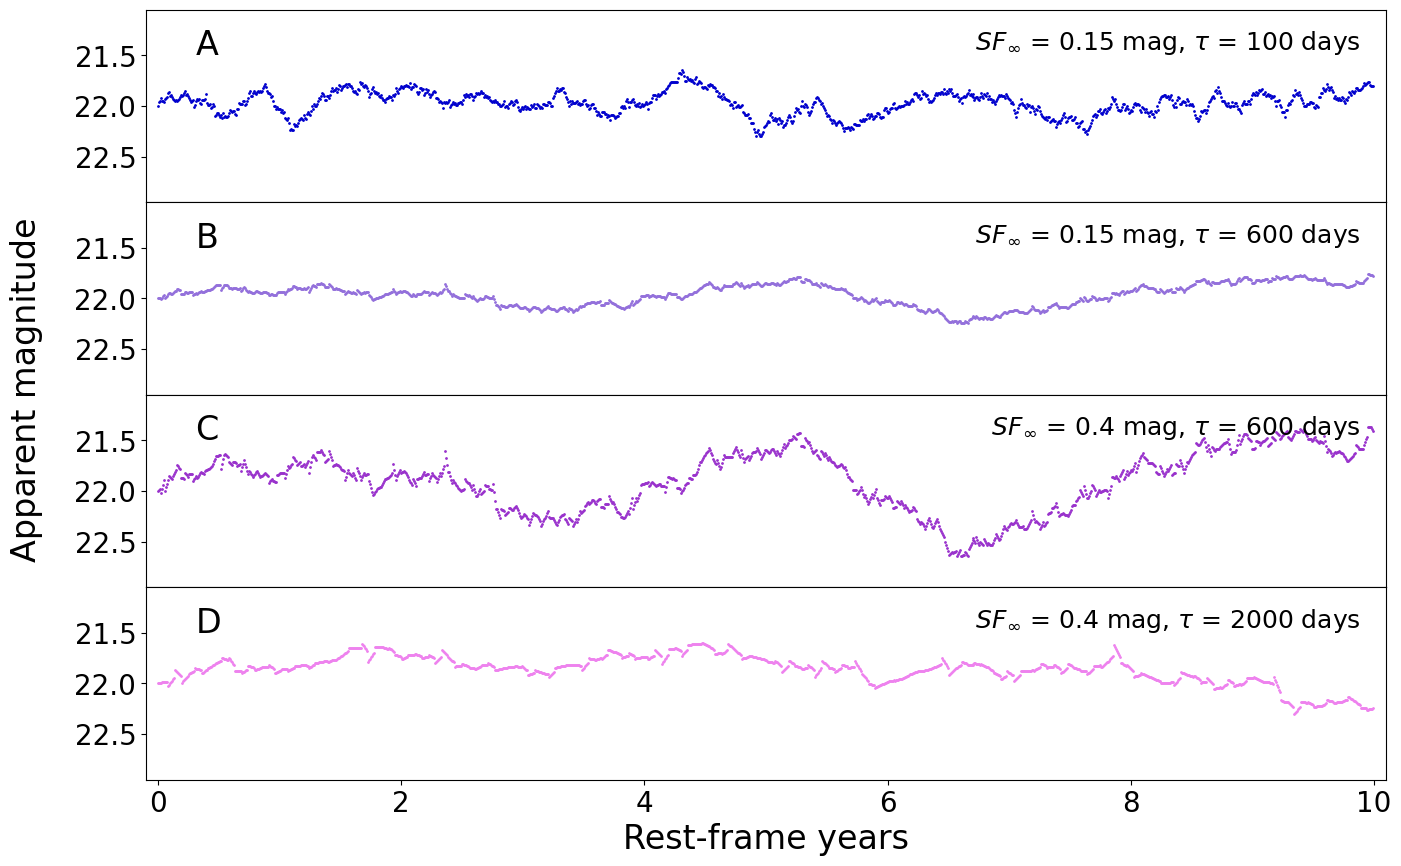

In [30]:
plt.rcParams.update(plt.rcParamsDefault)

star_sf = np.array([0.15, 0.15, 0.40, 0.40])
star_tau = np.array([100,600,600,2000])
lc_name = ['A','B','C','D']
colorlist = ['mediumblue','mediumpurple','darkorchid','violet']

# default settings: one observation per night
# npts = 365
duration = 365*10
_agn_walk_start_date = 0
t_drw = np.arange(start = _agn_walk_start_date, stop = _agn_walk_start_date+duration, step = 3)

redshift = 0 #assume we simulate the rest-frame light curve
time_dilation = redshift + 1
np.random.seed(2)
seed = 2

fig, axs = plt.subplots(4, 1, figsize=(16,10),sharex='col',gridspec_kw={'hspace': 0, 'wspace': 0})
for i in np.arange(4):
    SF = star_sf[i]
    tau = star_tau[i]
    # simulate light curve
    y_drw = simulate_agn(_agn_walk_start_date, t_drw, tau, time_dilation, SF, seed)
    # add mean mag and mag errors for lsst
    y_drw += 22.0
    yerr_drw = np.zeros(len(y_drw))
    y_drw, yerr_drw = add_lsst_noise(y_drw)
    axs[i].scatter(t_drw/365, y_drw,  c = colorlist[i], s = 1)
#     axs[i].errorbar(t_drw/365, y_drw, yerr_drw, fmt='.', markersize='1', c = colorlist[i], capsize=0.5, elinewidth=0.5 )
    axs[i].text(0.98, 0.9, transform=axs[i].transAxes, horizontalalignment='right', verticalalignment='top', s = r' $SF_\infty$ = {} mag, $\tau$ = {} days'.format(round(SF,3), round(tau,3)), 
                fontsize = 18)
    axs[i].text(0.04, 0.9, transform=axs[i].transAxes, horizontalalignment='left', verticalalignment='top', s = lc_name[i], fontsize = 24)
    axs[i].set_xlabel('Rest-frame years', fontsize = 24)
    axs[i].set_xlim([-0.1,10.1])
    axs[i].tick_params(axis="x", labelsize=20)
    axs[i].tick_params(axis="y", labelsize=20)
    axs[i].invert_yaxis()
    axs[i].set_ylim([22.95, 21.05])

fig.text(0.04, 0.5, 'Apparent magnitude', va='center', rotation='vertical', fontsize = 24)
# plt.ylabel('Apparent g-band magnitude', fontsize = 24)
plt.show()

### PSD of four plots

In [10]:
def psd_drw(sigma, tau, f):
    return 4*sigma**2*tau/(1+(2*np.pi*tau*f)**2)

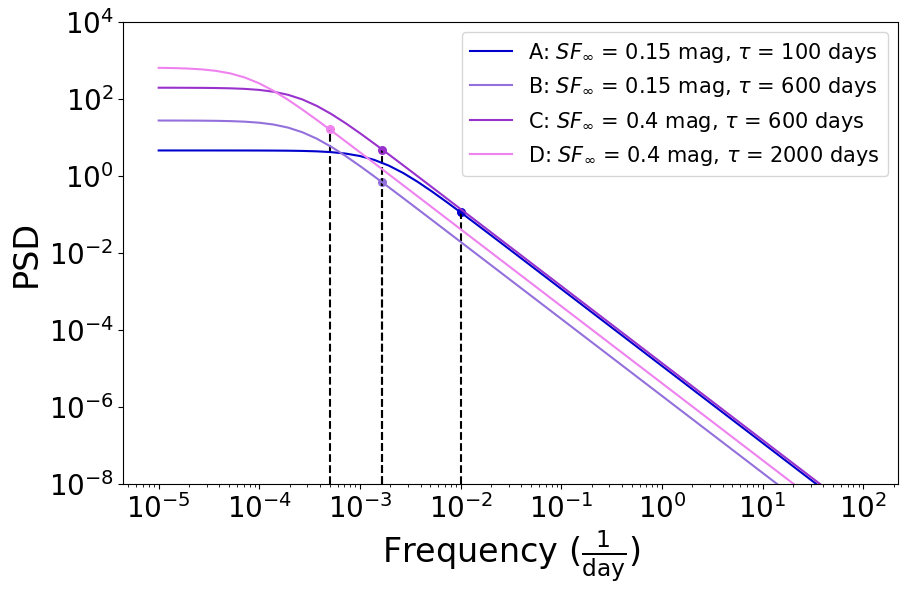

In [14]:

star_sf = np.array([0.15, 0.15, 0.40, 0.40])
star_tau = np.array([100,600,600,2000])
lc_name = ['A','B','C','D']
star_sigma = star_sf/np.sqrt(2)
colorlist = ['mediumblue','mediumpurple','darkorchid','violet']

plt.figure(figsize = (10,6))
f = np.logspace(-5, 2)
for i in np.arange(4):
    plt.plot(f, psd_drw(star_sigma[i], star_tau[i], f),c = colorlist[i],linewidth=1.5,
             label=lc_name[i]+r': $SF_\infty$ = {} mag, $\tau$ = {} days'.format(round(star_sf[i],2), round(star_tau[i],2)))
    plt.vlines(1/star_tau[i], 10e-9, psd_drw(star_sigma[i], star_tau[i], 1/star_tau[i]), colors = "black", linestyles = "dashed")
    plt.scatter(1/star_tau[i], psd_drw(star_sigma[i], star_tau[i], 1/star_tau[i]), s = 30,c = colorlist[i])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Frequency ($\frac{1}{\mathrm{day}}$)', fontsize = 24)
plt.ylabel('PSD', fontsize = 24)
plt.ylim([10e-9,10e3])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

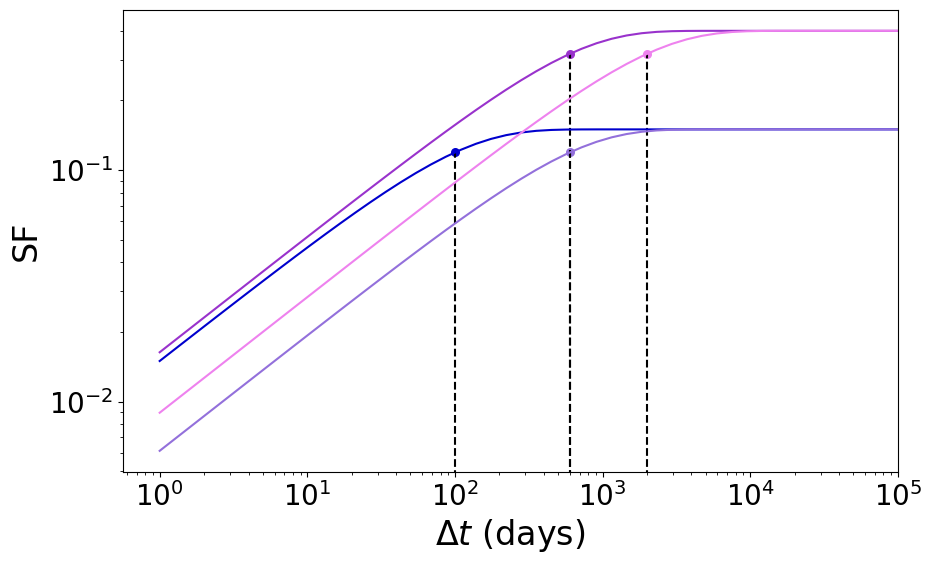

In [13]:
def drw_sf(SF_inft, tau, t):
    return SF_inft*np.sqrt(1 - np.exp(-np.absolute(t)/tau))

star_sf = np.array([0.15, 0.15, 0.40, 0.40])
star_tau = np.array([100,600,600,2000])
lc_name = ['A','B','C','D']
colorlist = ['mediumblue','mediumpurple','darkorchid','violet']

plt.figure(figsize = (10,6))

t = np.logspace(0, 5)
for i in np.arange(4):
    plt.plot(t, drw_sf(star_sf[i], star_tau[i], t),c = colorlist[i],linewidth=1.5,
             label=lc_name[i]+r': $SF_\infty$ = {} mag, $\tau$ = {} days'.format(round(star_sf[i],2), round(star_tau[i],2)))

    plt.vlines(star_tau[i], 0, drw_sf(star_sf[i], star_tau[i], star_tau[i]), colors = "black", linestyles = "dashed")
    plt.scatter(star_tau[i], drw_sf(star_sf[i], star_tau[i], star_tau[i]), s = 30,c = colorlist[i])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\Delta t$ (days)', fontsize = 24)
plt.ylabel('SF', fontsize = 24)
# plt.ylim([10e-9,10e3])
plt.xlim([0,10e4])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# plt.legend(fontsize = 15)
plt.show()

In [79]:
import random 

df = select_df
# random select a pair of DRW parameters
rand = random.randrange(0,2000)
tau = 10**(df['log_tau'][rand])
SF = 10**(df['log_SF'][rand])
seed = rand
redshift = df['redshift'][rand]

# user-defined
redshift = 0
tau = 36
SF = 0.2

time_dilation = redshift + 1

# RMS_var = SF/np.sqrt(2) # only when the flux mean == 0, RMS variability == standard variation!!!
npts = 365*10
duration = 365*10
# SNR = 20
np.random.seed(seed)

_agn_walk_start_date = 0
t_drw = np.arange(start = _agn_walk_start_date, stop = _agn_walk_start_date+duration, step = 0.5)
y_drw = simulate_agn(_agn_walk_start_date, t_drw, tau, time_dilation, SF, seed)



# as the y is already added with the noise, we need to remove the yerr and add lsst noise

yerr_drw = np.zeros(len(y_drw))
y_drw, yerr_drw = add_lsst_noise(y_drw)
y_drw = 24.0+(y_drw-yerr_drw)

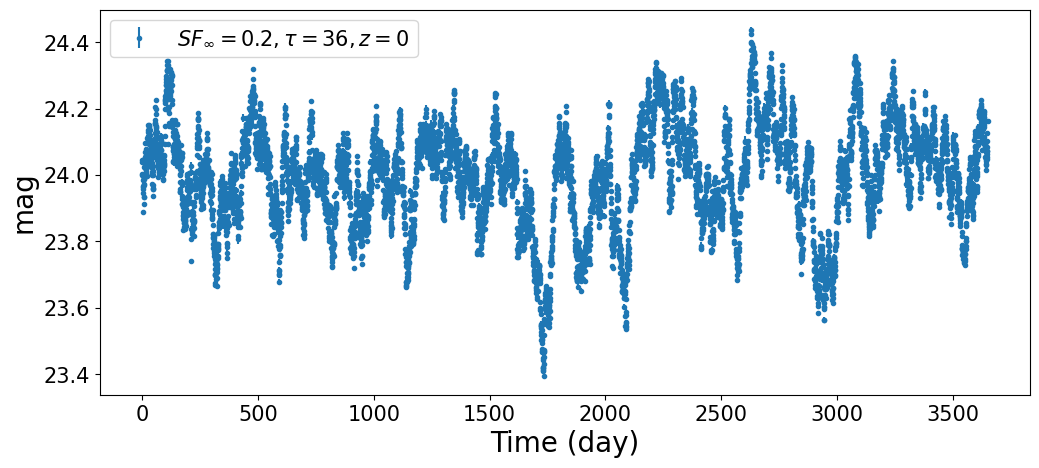

In [80]:
plot_lc(t_drw, y_drw, yerr_drw, SF, tau, redshift)

In [81]:
# np.sqrt(np.mean((y_drw-np.mean(y_drw))**2))
print(np.std(y_drw)*np.sqrt(2))
sigma= SF/np.sqrt(2)
print(SF)
# print(tau*(var**2)/2)
# print(best_fit_drw*np.sqrt(2))

# when tau is small, 10 years' observation std is very close to sigma.
# when tau is bigger, std is very different from sigma.

0.21578859585992533
0.2


### 4. Plot observed and true Structure Function

In [96]:
def calculate_SF(mjd, flux):
    # convert mjd to integer
    mjd = mjd.astype(int).tolist()
    flux = flux.astype(float).tolist()
    
    #initialize the delta time
    delta = 1
    obs_SF_list = []
    delta_list = []
    obs_len = max(mjd) - min(mjd)
    while delta < obs_len:
        n = min(mjd)
        count = 0
        mag_vals = 0.0
        while n <= max(mjd)-delta:
            if n in mjd and n+delta in mjd: 
                
                mag_vals += (flux[mjd.index(n+delta)] - flux[mjd.index(n)])**2   
                count +=1
            n = n + delta
        if count>0:
            obs_SF_list.append(np.sqrt(mag_vals/count))
            delta_list.append(delta)  
        delta +=1
    return obs_SF_list, delta_list

In [97]:
def plot_obs_SF(obs_SF_list, delta_list, band, SF_inft):
   
    plt.figure(figsize = (10,6))
    plt.scatter(np.log10(np.array(delta_list)), obs_SF_list, s = 3, color = 'black', label = r'$SF(\Delta t)$')
    plt.hlines(SF_inft, min(np.log10(np.array(delta_list))), max(np.log10(np.array(delta_list))), label = r'$SF_\infty$', color = 'r',linestyle='dashed')
    plt.xlabel(r'$log_{10}(\Delta t)$', fontsize=20)
    plt.yscale('log')
    plt.legend(fontsize = 20)
    plt.ylabel('Structure Function', fontsize=20)
    plt.title('Structure Function (Observed) ' + band +' band',fontsize=20 )
    
    

In [98]:
obs_SF_list, delta_list = calculate_SF(t_drw, y_drw)
plot_obs_SF(obs_SF_list, delta_list, 'u', SF)

KeyboardInterrupt: 

In [ ]:
def plot_true_SF(obs_SF_list, delta_list, flux_err, band, SF_inft):
    true_SF_list = []
    if len(flux_err)>0:   
        var_noise = np.var(flux_err)
    else:
        var_noise = 0
    for i in obs_SF_list:
        true_SF_list.append(np.sqrt(i**2 - 2*var_noise))
    plt.figure(figsize = (10,6))
    plt.scatter(np.log10(np.array(delta_list)), true_SF_list,s = 3, color = 'black',label = r'$SF(\Delta t)$')
    plt.hlines(SF_inft, min(np.log10(np.array(delta_list))), max(np.log10(np.array(delta_list))), label = r'$SF_\infty$', color = 'r',linestyle='dashed')
    plt.xlabel(r'$log_{10}(\Delta t)$', fontsize=20)
    plt.legend(fontsize = 20)
#     plt.xscale('log')
    plt.yscale('log')
    plt.ylabel('Structure Function', fontsize=20)
    plt.title('Structure Function (True) ' + band +' band', fontsize=20)

In [ ]:
plot_true_SF(obs_SF_list, delta_list, yerr_drw, 'u', SF)

### 5.  Fit light curve with using Eztao

In [101]:
best_fit_drw = drw_fit(t_drw, y_drw, yerr_drw)
print(f'Best-fit DRW parameter: {best_fit_drw}')
output_amp = best_fit_drw[0]
output_tau = best_fit_drw[1]
print(output_amp, output_tau)

Best-fit DRW parameter: [  0.13087083 115.78062599]
0.13087083471616967 115.78062598892603


### 5. fitting observed SF with model SF

In [77]:
def drw_sf(SF_inft, tau, t):
    return SF_inft*np.sqrt(1 - np.exp(-np.absolute(t)/tau))

def drw_sf2(out_amp, out_tau, t):
    return out_amp*np.sqrt(out_tau*(1-np.exp(-np.absolute(t)/out_tau)))

def fit_sf(obs_SF_list, delta_list, flux, flux_err, band, SF_inft, tau, best_fit_drw):
#     true_SF_list = []
#     if len(flux_err)>0:   
#         var_noise = np.var(flux_err)
#     else:
#         var_noise = 0
#     for i in obs_SF_list:
#         true_SF_list.append(np.sqrt(i**2 - 2*var_noise))
    amp = np.std(flux)
    plt.figure(figsize = (10,6))
    plt.scatter(delta_list, obs_SF_list,s = 3, color = 'black',label = r'$SF_{obs}(\Delta t)$')
    plt.plot(delta_list, drw_sf(best_fit_drw[0]*np.sqrt(2), best_fit_drw[1], delta_list), color = 'red', label = r'$SF_{drw}(\Delta t)$')
    plt.plot(delta_list, drw_sf2( best_fit_drw[0],  best_fit_drw[1], delta_list), color = 'blue', label = r'$SF_{drw2}(\Delta t)$')
    plt.xlabel(r'$log_{10}(\Delta t)$', fontsize=20)
    plt.legend(fontsize = 20)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel('Structure Function', fontsize=20)
    plt.title('Structure Function (Observed) ' + band +' band', fontsize=20)

0.2


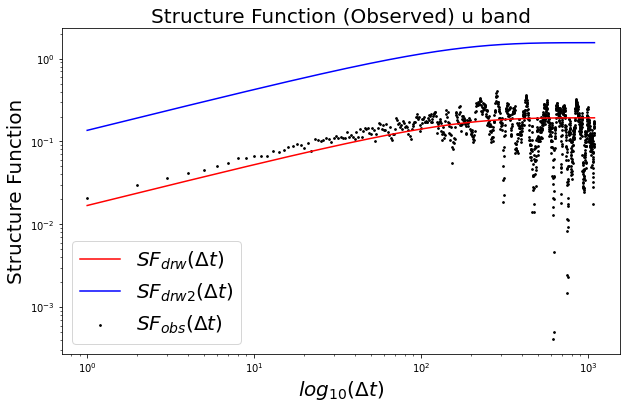

In [78]:
fit_sf(obs_SF_list, delta_list, y_drw, yerr_drw, 'u', SF, tau, best_fit_drw)
print(SF)

In [222]:
def calculate_ACVF(mjd, flux):
    #ACVF: auto-covariance function
    # learn from: https://www.real-statistics.com/time-series-analysis/stochastic-processes/autocorrelation-function/#:~:text=Definition%201%3A%20The%20autocorrelation%20function,variance%20of%20the%20stochastic%20process.&text=The%20variance%20of%20the%20time,is%20known%20as%20a%20correlogram.
    
    # convert mjd to integer
    mjd = mjd.astype(int).tolist()
    flux = flux.astype(float).tolist()
    
    #initialize the delta time
    delta = 1
    ACVF_list = []
    delta_list = []
    obs_len = max(mjd) - min(mjd)
    flux_mean = np.mean(flux)
    while delta < obs_len:
        n = min(mjd)
        count = 0
        mag_vals = 0.0
        while n <= max(mjd)-delta:
            if n in mjd and n+delta in mjd: 
                mag_vals += (flux[mjd.index(n+delta)]-flux_mean)*(flux[mjd.index(n)]-flux_mean) 
                count +=1
            n = n + delta
        if count>0:
            ACVF_list.append(mag_vals/count)
            delta_list.append(delta)  
        delta +=1
        
    return ACVF_list, delta_list
    
    
        


In [223]:
def plot_ACVF(ACVF_list, delta_list, band):
    
    plt.figure(figsize = (10,6))
    plt.scatter(delta_list, ACVF_list, s = 3, color = 'black')
    plt.xlabel(r'$log_{10}(\Delta t)$', fontsize=20)
    plt.xscale('log')
#     plt.yscale('log')
    plt.ylabel('ACVF ', fontsize=20)  
    plt.title('ACVF (' + band +' band)', fontsize=20)

def drw_acf(tau,t):
    return np.exp(-t/tau)

def plot_ACF(ACVF_list, delta_list, band, y_var, tau):
    
    ACF_list = np.array(ACVF_list)/y_var
    plt.figure(figsize = (10,6))
    plt.scatter(delta_list, ACF_list, s = 3, color = 'black', label = r'$ACF_{obs}(\Delta t)$')
    plt.plot(delta_list, drw_acf(tau, np.array(delta_list)), color = 'red',label = r'$ACF_{drw}(\Delta t)$' )
    plt.xlabel(r'$log_{10}(\Delta t)$', fontsize=20)
    plt.xscale('log')
    plt.ylabel('ACF ', fontsize=20)  
    plt.legend(fontsize=20)
    plt.title('ACF (' + band +' band)', fontsize=20)

    


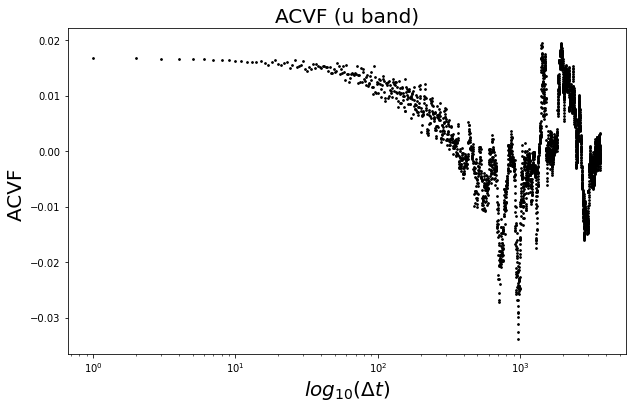

In [224]:

ACVF_list, delta_list = calculate_ACVF(t_drw, y_drw)
plot_ACVF(ACVF_list, delta_list, 'u')

In [105]:
plot_ACF(ACVF_list, delta_list, 'u', np.var(y_drw), tau)

NameError: name 'plot_ACF' is not defined

### 6. Downsampling with LSST Cadence Strategies

In [226]:
'''
load a cadence strategy from the folder 'light_curve_schemes/'
'''
import json
import numpy as np


cs_path = 'light_curve_schemes/'
file = 'cadence_drive_gl30_gcbv1.7_10yrs_mjds_ra-10_dec-10.json'
band = 'r'

with open(cs_path+file,'r') as f:
    cadence_mjds = json.loads(f.read())

'''
take one band as an example
'''
cb_mjds = np.array(cadence_mjds[band]).astype('int32')
cb_mjds -= cb_mjds[0]
cb_mjds = np.unique(cb_mjds)

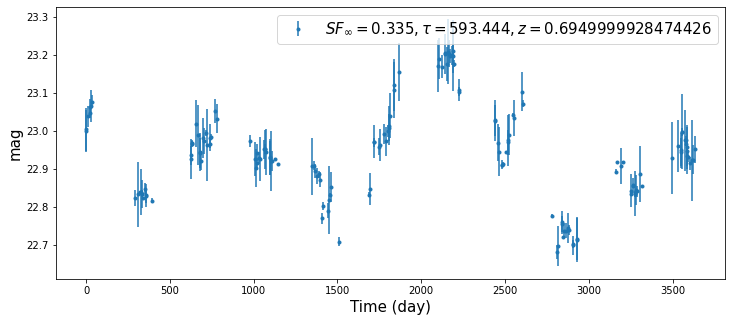

In [228]:
t_drw_ds, y_drw_ds, yerr_drw_ds = downsampling(cb_mjds, t_drw, y_drw, yerr_drw)
plot_lc(t_drw_ds, y_drw_ds, yerr_drw_ds, SF, tau, redshift)

In [232]:
import json
def compare_candences(cadence_list, t_drw, y_drw, yerr_drw, band):
#     plt.figure(figsize = (12,6))
    fig, ax = plt.subplots(figsize=(12,8))
    ax.errorbar(t_drw, y_drw, yerr_drw, fmt='.', color = 'black', label = 'uniform sampling')
    n = 1
    for cd in cadence_list:
        cs_path = 'light_curve_schemes/'
        with open(cs_path+cd+'.json','r') as f:
            cadence_mjds = json.loads(f.read())
        cb_mjds = np.array(cadence_mjds[band]).astype('int32')
        cb_mjds -= cb_mjds[0]
        cb_mjds = np.unique(cb_mjds)
        t_drw_ds, y_drw_ds, yerr_drw_ds = downsampling(cb_mjds, t_drw, y_drw, yerr_drw)
        ax.errorbar(t_drw_ds, y_drw_ds-0.2*n, yerr_drw_ds, fmt='.', label = cd[:-18])
        n += 1
        
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.legend(bbox_to_anchor=(1, 0.5), fontsize = 15)
    plt.yticks([])
    plt.xlabel('Time (day)',fontsize = 20) 
        
    plt.show()
    

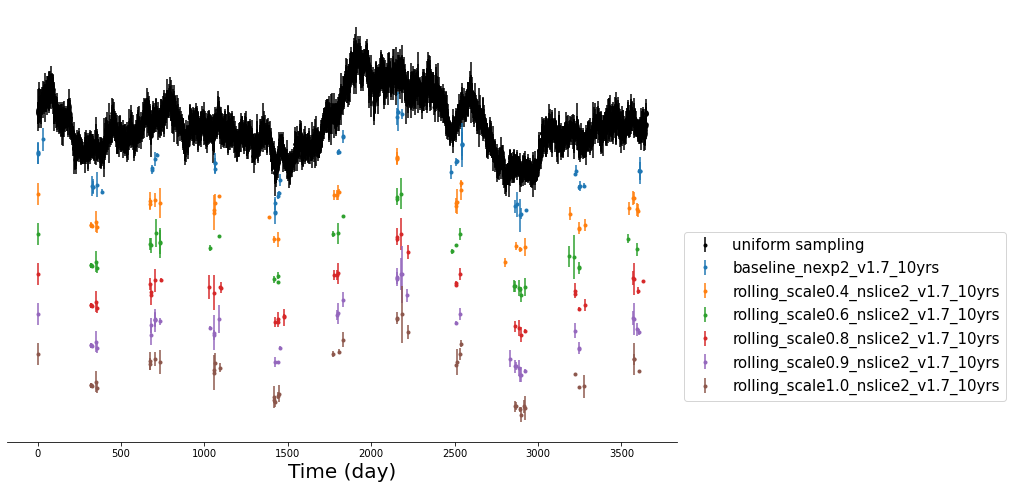

In [233]:
cadence_list = ['baseline_nexp2_v1.7_10yrs_mjds_ra-10_dec-10',
               'rolling_scale0.4_nslice2_v1.7_10yrs_mjds_ra-10_dec-10',
               'rolling_scale0.6_nslice2_v1.7_10yrs_mjds_ra-10_dec-10',
               'rolling_scale0.8_nslice2_v1.7_10yrs_mjds_ra-10_dec-10',
               'rolling_scale0.9_nslice2_v1.7_10yrs_mjds_ra-10_dec-10',
               'rolling_scale1.0_nslice2_v1.7_10yrs_mjds_ra-10_dec-10']
band = 'u'
compare_candences(cadence_list, t_drw, y_drw, yerr_drw, band)

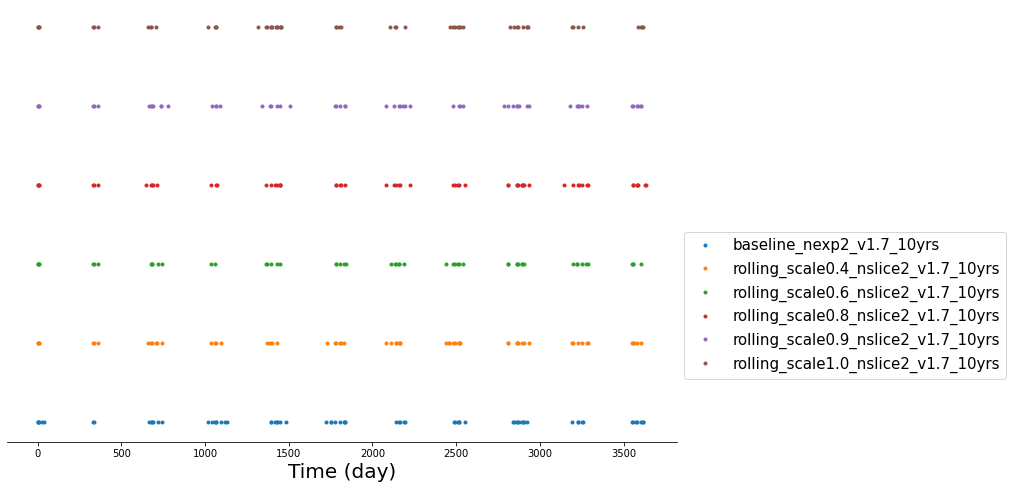

In [231]:

band = 'g'

fig, ax = plt.subplots(figsize=(12,8))
#     ax.errorbar(t_drw, y_drw, yerr_drw, fmt='.', color = 'black', label = 'uniform sampling')
n = 1
for cd in cadence_list:
    cs_path = 'light_curve_schemes/'
    with open(cs_path+cd+'.json','r') as f:
        cadence_mjds = json.loads(f.read())
    cb_mjds = np.array(cadence_mjds[band]).astype('int32')
    cb_mjds -= cb_mjds[0]
    cb_mjds = np.unique(cb_mjds)
    ax.errorbar(cb_mjds, [n]*len(cb_mjds), fmt='.', label = cd[:-18])
    n += 1

    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.legend(bbox_to_anchor=(1, 0.5), fontsize = 15)
plt.yticks([])
# plt.xlim([0,600])
plt.xlabel('Time (day)',fontsize = 20) 

plt.show()
 